# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>I. </b> Introduction</p></div>
 
<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">A. Overview of the Dataset</span>
</body>
</html>

The PRDECT-ID Dataset is a comprehensive compilation of Indonesian product reviews meticulously annotated with both emotion and sentiment labels. Sourced from Tokopedia, a prominent e-commerce platform in Indonesia, this dataset encompasses feedback across 29 distinct product categories, all expressed in the Indonesian language. Each review is thoughtfully tagged with a specific emotion, including love, happiness, anger, fear, or sadness. These annotations are derived from a well-defined set of criteria established by an expert in clinical psychology, ensuring accuracy and consistency in emotional labeling. Furthermore, supplementary attributes such as Location, Price, Overall Rating, Number Sold, Total Review, and Customer Rating have been included to facilitate in-depth research and analysis.

<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">B. Purpose of Analysis</span>
</body>
</html>

The primary aim of this analysis is to unlock valuable insights from the PRDECT-ID Dataset, shedding light on the intricate relationship between product reviews, emotions, and sentiments within the Indonesian market. By employing advanced text mining and sentiment analysis techniques, we seek to discern patterns, trends, and sentiment distributions across various product categories. This endeavor holds potential for enhancing customer-centric strategies, product development, and marketing efforts in the Indonesian e-commerce landscape.

# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline

import warnings                    
warnings.filterwarnings('ignore')

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Load the Dataset</p></div>

In [2]:
## Load the dataset into the environment

df = pd.read_csv('/kaggle/input/prdect-id-indonesian-emotion-classification/Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset/PRDECT-ID Dataset.csv')

df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>II. </b> Data Preprocessing</p></div>

<!DOCTYPE html>
<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">A. Data Cleaning</span>
    <ol>
        <li style="color: purple; font-size: 18px;">Handling missing values</li>
        <li style="color: purple; font-size: 18px;">Removing duplicates</li>
        <li style="color: purple; font-size: 18px;">Removing irrelevant columns</li>
    </ol>
</body>
</html>


In [3]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 5400
Number of features (columns) in the dataset are: 11
Number of duplicate entries in the dataset are: 7
Number missing values in the dataset are: 0


In [4]:
df.dropna(subset=['Customer Review'], inplace=True)

In [5]:
# Removing duplicates
df.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)


In [6]:
# Removing irrelevant columns
df.drop(['Location', 'Price', 'Number Sold'], axis=1, inplace=True)


In [7]:
df.describe().style.background_gradient(cmap='tab20c')

,Overall Rating,Total Review,Customer Rating
count,5305.000000,5305.000000,5305.000000
mean,4.854288,2158.940245,3.101791
std,0.108556,2912.542848,1.762642
min,4.100000,4.000000,1.000000
25%,4.800000,574.000000,1.000000
50%,4.900000,1188.000000,3.000000
75%,4.900000,2561.000000,5.000000
max,5.000000,24500.000000,5.000000


<!DOCTYPE html>
<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">B. Text Normalization</span>
    <ol>
        <li style="color: purple; font-size: 18px;">Lowercasing</li>
        <li style="color: purple; font-size: 18px;">Removing special characters</li>
        <li style="color: purple; font-size: 18px;">Removing stopwords</li>
    </ol>
</body>
</html>

 
 

In [8]:
# 1. Lowercasing
df['Customer Review'] = df['Customer Review'].str.lower()


In [9]:
# 2. Removing special characters
df['Customer Review'] = df['Customer Review'].str.replace('[^\w\s]', '')

In [10]:
# 3. Removing stopwords
stop_words = set(stopwords.words('indonesian'))
df['Customer Review'] = df['Customer Review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>III. </b> Exploratory Data Analysis</p></div>

<span style="color: blue; font-weight: bold; font-size: 20px;">A. Distribution of Ratings and Sentiments</span>

<span style="color: blue; font-weight: bold; font-size: 20px;">B. Word Frequency Analysis</span>
 

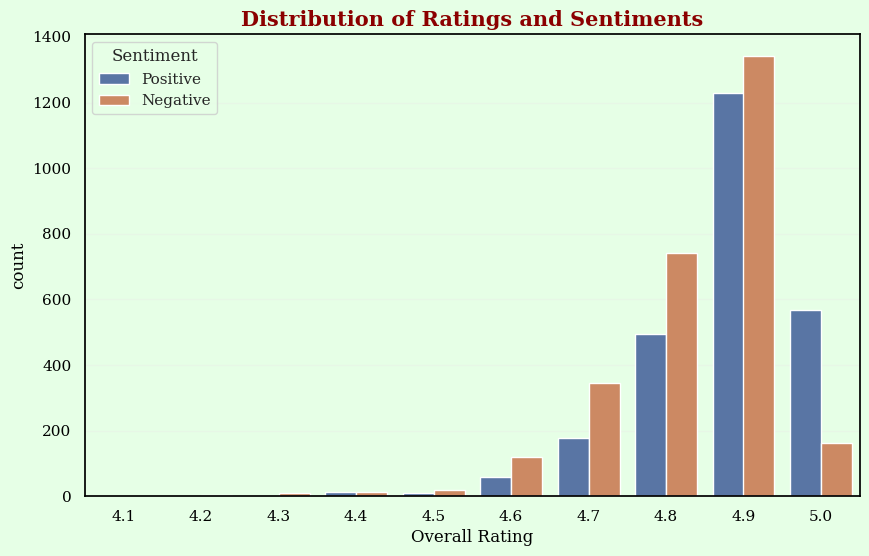

In [11]:
# A. Distribution of Ratings and Sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall Rating', hue='Sentiment', data=df)
plt.title('Distribution of Ratings and Sentiments', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Distribution of Ratings and Sentiments.png')
plt.show()

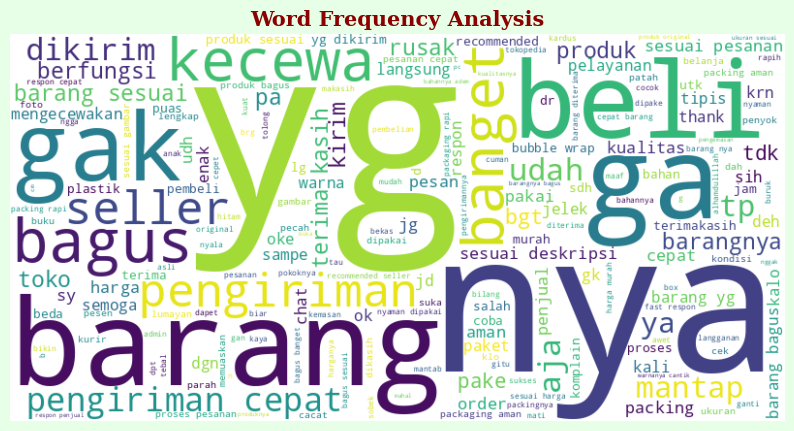

In [12]:
# B. Word Frequency Analysis
reviews = ' '.join(df['Customer Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Word Frequency Analysis.png')
plt.show()

# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>IV. </b> Sentiment Analysis </p></div>


<!DOCTYPE html>
<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">A. Sentiment Labeling</span>
    <ol>
        <li style="color: purple; font-size: 18px;">Using Customer Rating</li>
        <li style="color: purple; font-size: 18px;">Using Customer Review Text</li>
    </ol>
    <span style="color: blue; font-weight: bold; font-size: 20px;">B. Sentiment Distribution</span>
</body>
</html>

In [13]:
# 1. Using Customer Rating
df['Sentiment (Using Rating)'] = df['Overall Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')


In [14]:
# 2. Using Customer Review Text (Example: Using a simple sentiment analysis library like TextBlob)
from textblob import TextBlob
df['Sentiment (Using TextBlob)'] = df['Customer Review'].apply(lambda x: 'Positive' if TextBlob(x).sentiment.polarity > 0 else 'Negative')


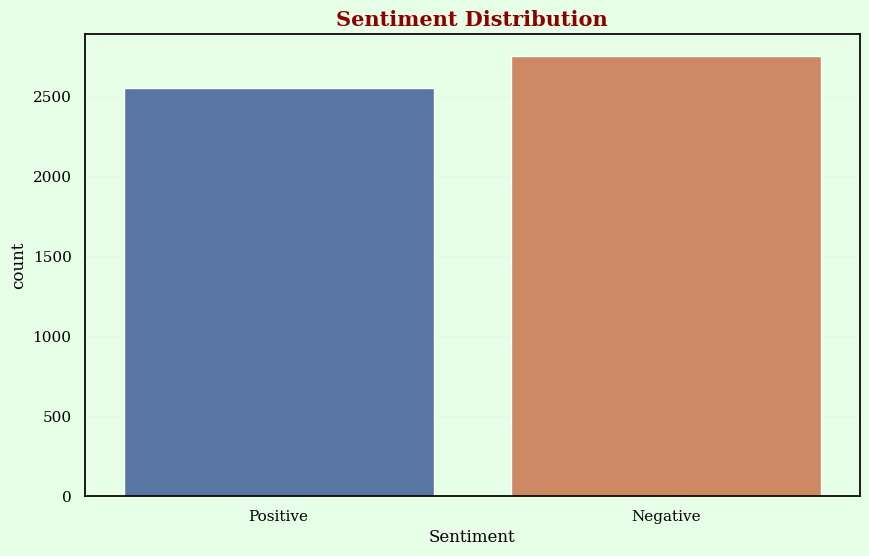

In [15]:
# B. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Sentiment Distribution.png')
plt.show()

# <div style="color:red;display:inline-block;border-radius:5px;background-color:#E6FFE6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>V. </b> Emotion Analysis </p></div>
 
<!DOCTYPE html>
<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">A. Emotion Labeling</span>
    <ol>
        <li style="color: purple; font-size: 18px;">Using Emotion Label provided in the dataset (already available in the dataset)</li>
    </ol>
    <span style="color: blue; font-weight: bold; font-size: 20px;">B. Emotion Distribution</span>    
    <ol>
        <!-- Removed Method 1 and Method 2 -->
    </ol>
    <span style="color: blue; font-weight: bold; font-size: 20px;">C. Emotion Analysis Techniques </span>
    <ol>
        <!-- Removed Technique 1 and Technique 2 -->
    </ol>
    <span style="color: blue; font-weight: bold; font-size: 20px;">D. Evaluation Metrics </span>
    <ol>
        <!-- Removed Metric 1 and Metric 2 -->
    </ol>
</body>
</html>



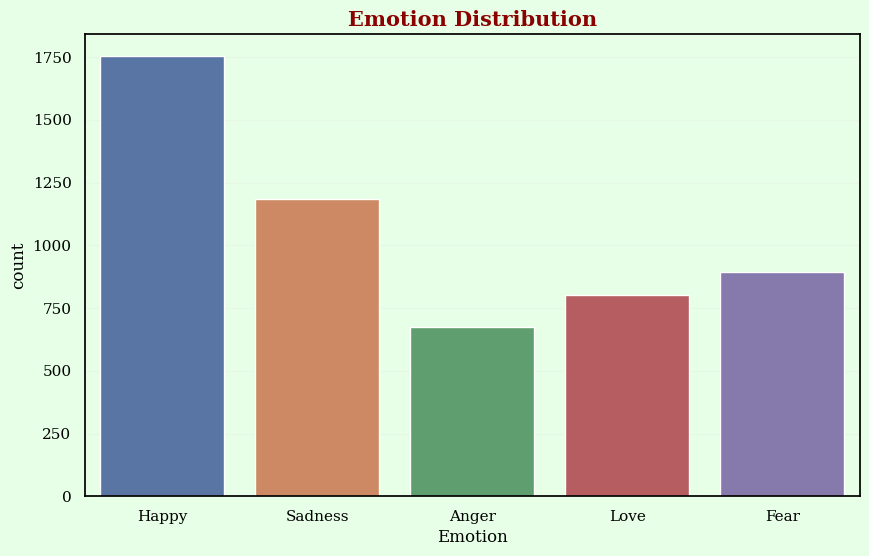

In [16]:
# B. Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.show()

In [17]:
# C. Emotion Analysis Techniques (Rule-based approach using predefined emotion keywords)
happy_keywords = ['love', 'happy', 'joy', 'excited']
sad_keywords = ['sad', 'disappointed', 'unhappy', 'regret']
neutral_keywords = ['neutral', 'okay', 'fine']

def classify_emotion(text):
    if any(word in text for word in happy_keywords):
        return 'Happy'
    elif any(word in text for word in sad_keywords):
        return 'Sad'
    elif any(word in text for word in neutral_keywords):
        return 'Neutral'
    else:
        return 'Other'

df['Emotion (Rule-based)'] = df['Customer Review'].apply(classify_emotion)


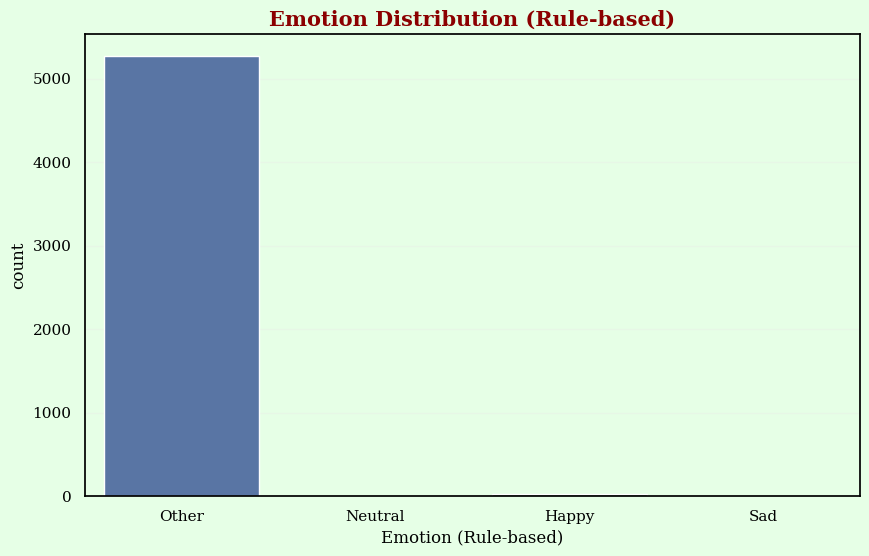

In [18]:
# D. Evaluation Metrics 

# Additional visualization for Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion (Rule-based)', data=df)
plt.title('Emotion Distribution (Rule-based)', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution (Rule-based).png')
plt.show()

<html>
<body>
    <span style="color: blue; font-weight: bold; font-size: 20px;">Customer Segmentation using K-Means and Hierarchical Clustering</span>
</body>
</html>



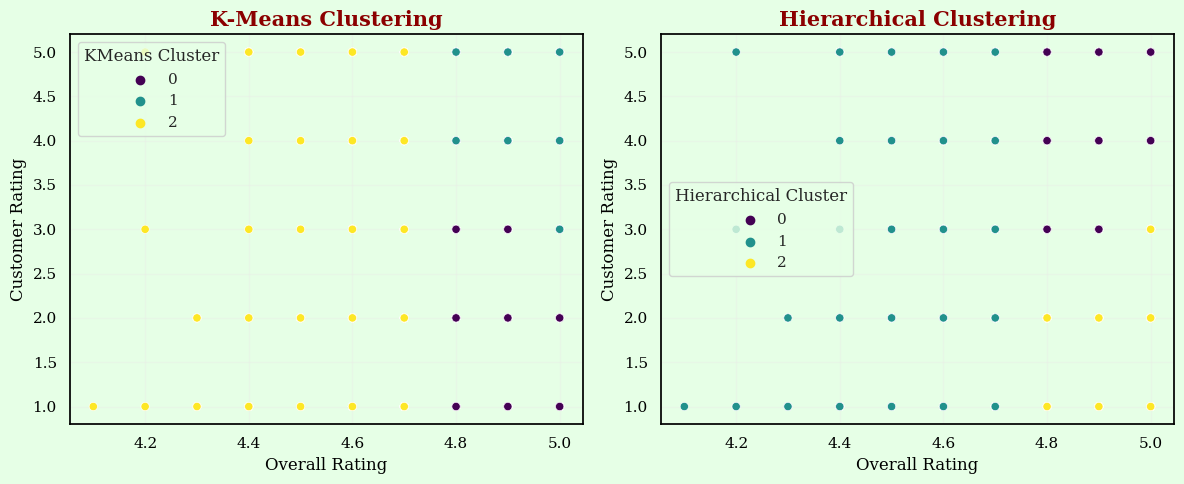

K-Means Cluster Counts:
KMeans Cluster
1    2286
0    2248
2     771
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical Cluster
0    2617
2    1917
1     771
Name: count, dtype: int64


In [19]:
# Feature Selection for Clustering
X = df[['Overall Rating', 'Customer Rating']]  # Select relevant features for clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Customer Segmentation using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans Cluster'] = kmeans.fit_predict(X_scaled)

# Customer Segmentation using Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical Cluster'] = hierarchical.fit_predict(X_scaled)

# Visualize the Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Overall Rating', y='Customer Rating', hue='KMeans Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering', fontsize = 15, fontweight = 'bold', color = 'darkred')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Overall Rating', y='Customer Rating', hue='Hierarchical Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering', fontsize = 15, fontweight = 'bold', color = 'darkred')

plt.tight_layout()
plt.savefig('K-Means Clustering & Hierarchical Clustering.png')
plt.show()

# Print Results 
kmeans_counts = df['KMeans Cluster'].value_counts()
hierarchical_counts = df['Hierarchical Cluster'].value_counts()

print("K-Means Cluster Counts:")
print(kmeans_counts)
print("\nHierarchical Cluster Counts:")
print(hierarchical_counts)

In [20]:
## Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)

[[0.42112583 1.07701292]
 [0.42112583 1.07701292]
 [1.34239286 1.07701292]
 ...
 [0.42112583 1.07701292]
 [0.42112583 1.07701292]
 [0.42112583 1.07701292]]


In [21]:
# Model fitting with 5 clusters

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [22]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            
df_Kmeans['Cluster'] = y_kmeans  
print(df_Kmeans.head(5))

                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1  Computers and Laptops  PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2  Computers and Laptops                SSD Midasforce 128 Gb - Tanpa Caddy   
3  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   

   Overall Rating  Total Review  Customer Rating  \
0             4.9          2369                5   
1             4.9          1044                5   
2             5.0          3573                5   
3             4.7           672                5   
4             4.7           672                5   

                                     Customer Review Sentiment Emotion  \
0  alhamdulillah berfungsi . packaging aman . res...  Positive   Happy   
1    barang bagus respon cepat , harga bersaing yg .  Positive  

In [23]:
## Let's start the Hierarchial analysis by normalizing the data and
## building a dataframe for analysis
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

   Overall Rating  Customer Rating
0        0.888889              1.0
1        0.888889              1.0
2        1.000000              1.0
3        0.666667              1.0
4        0.666667              1.0


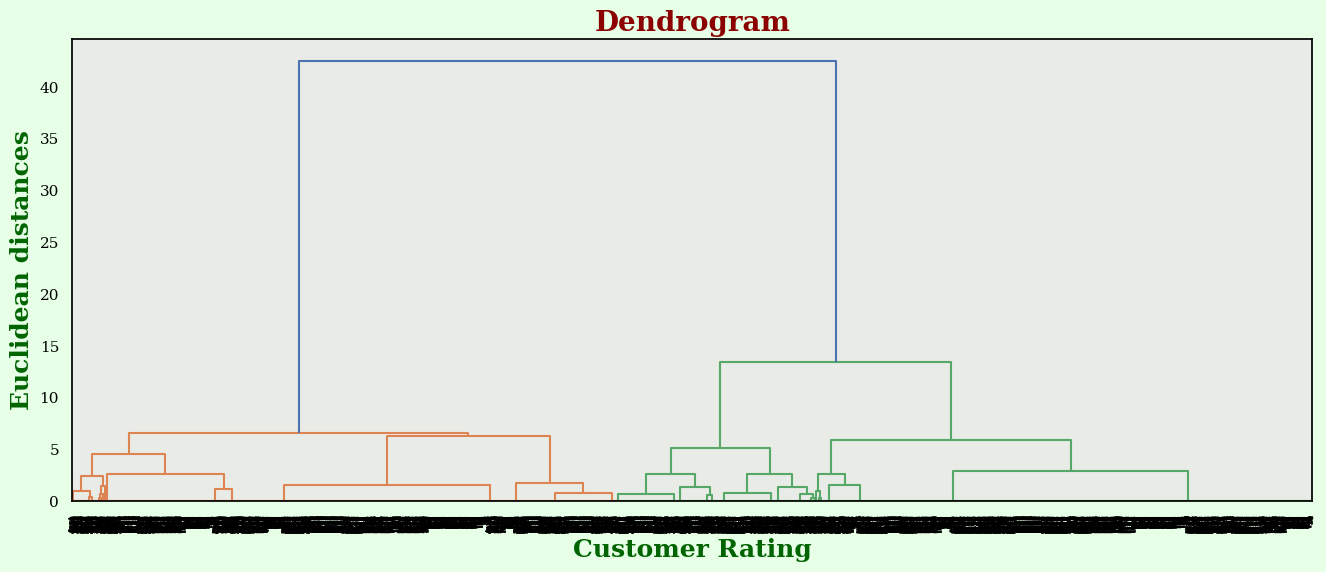

In [24]:
# Build dendrogram to find out the optimal number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20, fontweight = 'bold', color = 'darkred')
plt.xlabel('Customer Rating', fontsize=18, fontweight = 'bold', color = 'darkgreen')
plt.ylabel('Euclidean distances', fontsize=18,fontweight = 'bold', color = 'darkgreen')
plt.savefig('Dendrogram.png')
plt.show()

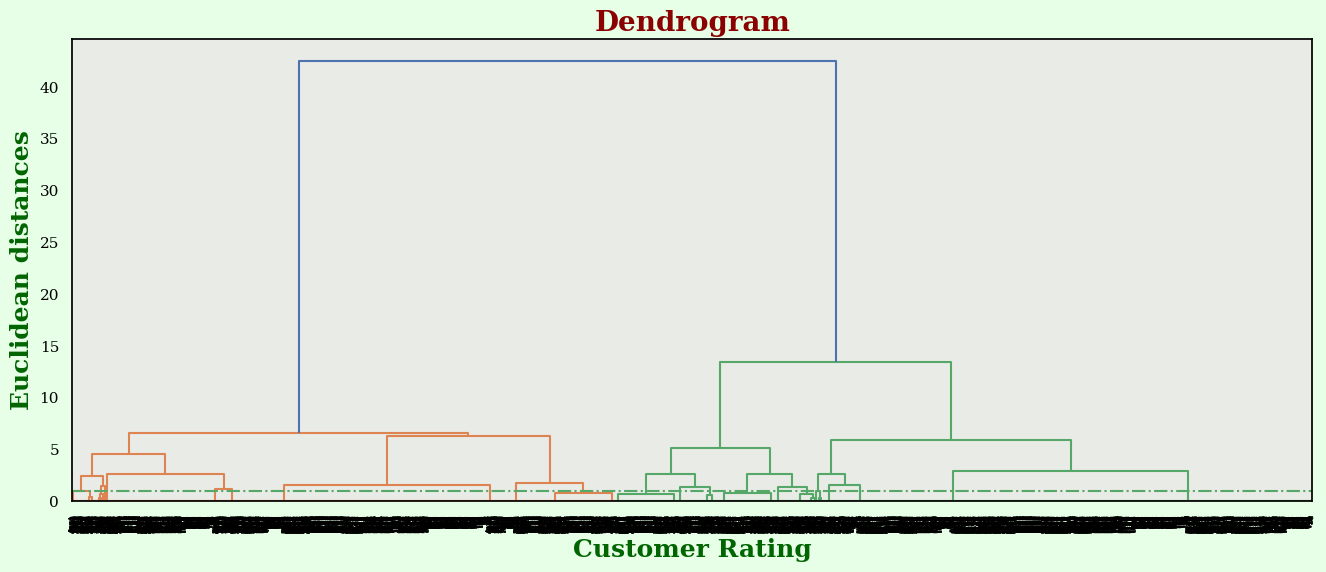

In [25]:
## Draw the threshold level to identify the ideal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20,fontweight = 'bold', color = 'darkred')
plt.xlabel('Customer Rating', fontsize=18,fontweight = 'bold', color = 'darkgreen')
plt.ylabel('Euclidean distances', fontsize=18,fontweight = 'bold', color = 'darkgreen')
plt.show()

<div class="alert alert-block alert-info"> 📌 "Take some time to explore and create a notebook based on your insights. Your contributions offer valuable perspectives. If you find the dataset interesting, an upvote would be greatly appreciated. Your support encourages collaboration and knowledge sharing. Thank you!"😊 </div>